In [213]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [337]:
data_file = "audio_features.csv"

df = pd.read_csv(data_file)
pd.set_option('display.max_columns', None)
df

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,chroma_0,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,mel_0,mel_1,mel_2,mel_3,mel_4,mel_5,mel_6,mel_7,mel_8,mel_9,mel_10,mel_11,mel_12,mel_13,mel_14,mel_15,mel_16,mel_17,mel_18,mel_19,mel_20,mel_21,mel_22,mel_23,mel_24,mel_25,mel_26,mel_27,mel_28,mel_29,mel_30,mel_31,mel_32,mel_33,mel_34,mel_35,mel_36,mel_37,mel_38,mel_39,mel_40,mel_41,mel_42,mel_43,mel_44,mel_45,mel_46,mel_47,mel_48,mel_49,mel_50,mel_51,mel_52,mel_53,mel_54,mel_55,mel_56,mel_57,mel_58,mel_59,mel_60,mel_61,mel_62,mel_63,mel_64,mel_65,mel_66,mel_67,mel_68,mel_69,mel_70,mel_71,mel_72,mel_73,mel_74,mel_75,mel_76,mel_77,mel_78,mel_79,mel_80,mel_81,mel_82,mel_83,mel_84,mel_85,mel_86,mel_87,mel_88,mel_89,mel_90,mel_91,mel_92,mel_93,mel_94,mel_95,mel_96,mel_97,mel_98,mel_99,mel_100,mel_101,mel_102,mel_103,mel_104,mel_105,mel_106,mel_107,mel_108,mel_109,mel_110,mel_111,mel_112,mel_113,mel_114,mel_115,mel_116,mel_117,mel_118,mel_119,mel_120,mel_121,mel_122,mel_123,mel_124,mel_125,mel_126,mel_127,lyric_0,lyric_1,lyric_2,lyric_3,lyric_4,lyric_5,lyric_6,lyric_7,lyric_8,lyric_9,lyric_10,lyric_11,lyric_12,lyric_13,lyric_14,lyric_15,lyric_16,lyric_17,lyric_18,lyric_19,lyric_20,lyric_21,lyric_22,lyric_23,lyric_24,lyric_25,lyric_26,lyric_27,lyric_28,lyric_29,lyric_30,lyric_31,lyric_32,lyric_33,lyric_34,lyric_35,lyric_36,lyric_37,lyric_38,lyric_39,lyric_40,lyric_41,lyric_42,lyric_43,lyric_44,lyric_45,lyric_46,lyric_47,lyric_48,lyric_49,lyric_50,lyric_51,lyric_52,lyric_53,lyric_54,lyric_55,lyric_56,lyric_57,lyric_58,lyric_59,lyric_60,lyric_61,lyric_62,lyric_63,lyric_64,lyric_65,lyric_66,lyric_67,lyric_68,lyric_69,lyric_70,lyric_71,lyric_72,lyric_73,lyric_74,lyric_75,lyric_76,lyric_77,lyric_78,lyric_79,lyric_80,lyric_81,lyric_82,lyric_83,lyric_84,lyric_85,lyric_86,lyric_87,lyric_88,lyric_89,lyric_90,lyric_91,lyric_92,lyric_93,lyric_94,lyric_95,lyric_96,lyric_97,lyric_98,lyric_99,label
0,-177.53653,146.581310,-0.213761,41.228962,0.291190,19.701117,-14.081721,12.296306,-2.576464,-2.150595,4.339947,-4.343766,0.628467,-5.329404,0.075212,-4.354529,0.513913,-3.582065,-2.392741,-3.715229,0.411439,0.486644,0.550818,0.477316,0.499035,0.523470,0.365942,0.343171,0.375355,0.468421,0.397482,0.363219,103.075530,283.917600,190.964050,104.999500,70.826294,40.696760,48.396954,39.866318,48.330746,47.567070,65.594500,26.664543,16.059223,26.066881,8.023824,6.560778,9.290979,11.783270,12.171549,8.743134,11.207910,12.714543,5.688521,4.344077,6.815128,3.400586,5.094750,9.803142,4.099811,1.879592,2.263550,2.487741,4.108537,2.208640,1.719356,2.236730,2.016826,1.127379,0.972732,1.288436,0.872762,1.159349,1.022214,1.126490,1.198486,1.034105,0.933061,0.684346,1.020923,0.897400,0.647819,0.709234,0.713876,0.947022,0.908746,0.697249,1.016017,0.987729,0.663537,0.511290,0.727437,0.661066,0.636771,0.589480,0.584139,0.470780,0.568177,0.518038,0.511439,0.509263,0.355044,0.287939,0.290094,0.300506,0.236947,0.238290,0.215294,0.237830,0.212603,0.176991,0.154490,0.131374,0.116294,0.096092,0.094899,0.108742,0.088728,0.077661,0.088157,0.083618,0.075280,0.071812,0.074179,0.077172,0.067056,0.070895,0.065022,0.063768,0.076176,0.070324,0.069271,0.066738,0.077959,0.085333,0.079367,0.068581,0.054471,0.040985,0.034418,0.028478,0.025743,0.018835,0.011994,0.008142,0.006198,0.004648,0.001715,0.000130,1.715324e-09,8.726396e-10,2.951443e-10,2.019676e-10,3.808507e-10,1.879035e-10,3.153673e-10,1.235672e-10,3.696249e-10,1.710140e-10,0.000000,0.267746,0.029773,0.000000,0.030886,0.105489,0.000000,0.057496,0.000000,0.056977,0.096160,0.0,0.000000,0.000000,0.075456,0.000000,0.109496,0.000000,0.600857,0.127779,0.000000,0.000000,0.080406,0.139981,0.235972,0.341420,0.000000,0.000000,0.074296,0.000000,0.000000,0.036499,0.157806,0.067512,0.088955,0.000000,0.054160,0.000000,0.000000,0.024364,0.140671,0.128692,0.000000,0.000000,0.025392,0.10171

In [338]:
df['label'].value_counts()

,count
label,
Nhạc trẻ,1567
Trữ tình,1159
Hiphop,663
Thiếu nhi,484


In [339]:
X = df.iloc[:, :-1].values
y = pd.get_dummies(df["label"]).values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = X.reshape(X.shape[0], 1, X.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18, stratify=y)
X.shape

(3873, 1, 260)

Label distribution in training set:
0    0.171078
1    0.404777
2    0.124919
3    0.299225
Name: proportion, dtype: float64

Label distribution in test set:
0    0.171613
1    0.403871
2    0.125161
3    0.299355
Name: proportion, dtype: float64


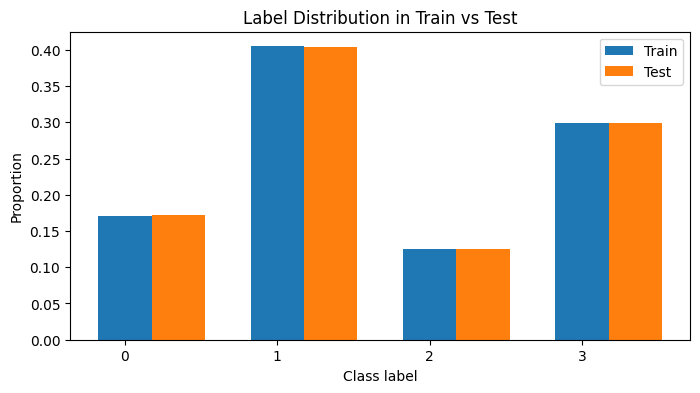


Features with significant distribution difference (KS-test p < 0.05):
Feature 4: KS statistic=0.065, p-value=0.01019
Feature 20: KS statistic=0.058, p-value=0.03125
Feature 37: KS statistic=0.063, p-value=0.01466
Feature 38: KS statistic=0.063, p-value=0.01311
Feature 46: KS statistic=0.075, p-value=0.00190
Feature 49: KS statistic=0.062, p-value=0.01668
Feature 54: KS statistic=0.058, p-value=0.02862
Feature 74: KS statistic=0.057, p-value=0.03284
Feature 116: KS statistic=0.055, p-value=0.04456
Feature 119: KS statistic=0.062, p-value=0.01569
Feature 120: KS statistic=0.059, p-value=0.02608
Feature 121: KS statistic=0.054, p-value=0.04967
Feature 122: KS statistic=0.065, p-value=0.00985
Feature 123: KS statistic=0.062, p-value=0.01625
Feature 124: KS statistic=0.062, p-value=0.01703
Feature 125: KS statistic=0.062, p-value=0.01740
Feature 126: KS statistic=0.073, p-value=0.00275
Feature 127: KS statistic=0.072, p-value=0.00321
Feature 128: KS statistic=0.072, p-value=0.00317
Feature

In [340]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ks_2samp

y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

train_label_counts = pd.Series(y_train_labels).value_counts(normalize=True).sort_index()
test_label_counts = pd.Series(y_test_labels).value_counts(normalize=True).sort_index()

print("Label distribution in training set:")
print(train_label_counts)
print("\nLabel distribution in test set:")
print(test_label_counts)

plt.figure(figsize=(8,4))
index = np.arange(len(train_label_counts))
bar_width = 0.35
plt.bar(index, train_label_counts, bar_width, label='Train')
plt.bar(index + bar_width, test_label_counts, bar_width, label='Test')
plt.xlabel('Class label')
plt.ylabel('Proportion')
plt.title('Label Distribution in Train vs Test')
plt.xticks(index, train_label_counts.index)
plt.legend()
plt.show()

X_train_2d = X_train.reshape(X_train.shape[0], X_train.shape[2])
X_test_2d = X_test.reshape(X_test.shape[0], X_test.shape[2])

ks_results = []
for i in range(X_train_2d.shape[1]):
    stat, p_value = ks_2samp(X_train_2d[:, i], X_test_2d[:, i])
    ks_results.append((i, stat, p_value))

print("\nFeatures with significant distribution difference (KS-test p < 0.05):")
for i, stat, p in ks_results:
    if p < 0.05:
        print(f"Feature {i}: KS statistic={stat:.3f}, p-value={p:.5f}")



In [341]:
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.3), input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(LSTM(32, return_sequences=True, dropout=0.3)),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(16, dropout=0.3),
    Dense(y_train.shape[1], activation="softmax")
])

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_80                │ (None, 1, 128)         │       166,400 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_80          │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_124 (Dropout)           │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_81                │ (None, 1, 64)          │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_81          │ (None, 1, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_125 (Dropout)           │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_122 (LSTM)                 │ (None, 16)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,636 (834.52 KB)

 Trainable params: 213,252 (833.02 KB)

 Non-trainable params: 384 (1.50 KB)

In [342]:
from tensorflow.keras.callbacks import ModelCheckpoint

# === Callbacks ===
early = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

checkpoint = ModelCheckpoint(
    filepath="best_model.h5",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

# callbacks = [early, reduce_lr, checkpoint]
callbacks = [early, reduce_lr, checkpoint]


In [343]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2943 - loss: 1.3702
Epoch 1: val_loss improved from inf to 1.25294, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.2953 - loss: 1.3697 - val_accuracy: 0.6052 - val_loss: 1.2529 - learning_rate: 0.0010
Epoch 2/50
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5890 - loss: 1.1366
Epoch 2: val_loss improved from 1.25294 to 0.84489, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5903 - loss: 1.1333 - val_accuracy: 0.8116 - val_loss: 0.8449 - learning_rate: 0.0010
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7300 - loss: 0.8147
Epoch 3: val_loss improved from 0.84489 to 0.48240, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7302 - loss: 0.8141 - val_accuracy: 0.8632 - val_loss: 0.4824 - learning_rate: 0.0010
Epoch 4/50
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7965 - loss: 0.6120
Epoch 4: val_loss improved from 0.48240 to 0.38239, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7972 - loss: 0.6103 - val_accuracy: 0.8735 - val_loss: 0.3824 - learning_rate: 0.0010
Epoch 5/50
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8348 - loss: 0.4901
Epoch 5: val_loss improved from 0.38239 to 0.34851, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8347 - loss: 0.4899 - val_accuracy: 0.8839 - val_loss: 0.3485 - learning_rate: 0.0010
Epoch 6/50
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8459 - loss: 0.4257
Epoch 6: val_loss improved from 0.34851 to 0.33073, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8458 - loss: 0.4263 - val_accuracy: 0.8852 - val_loss: 0.3307 - learning_rate: 0.0010
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8344 - loss: 0.4593
Epoch 7: val_loss improved from 0.33073 to 0.31112, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8345 - loss: 0.4591 - val_accuracy: 0.8903 - val_loss: 0.3111 - learning_rate: 0.0010
Epoch 8/50
92/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8686 - loss: 0.3785
Epoch 8: val_loss did not improve from 0.31112
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8678 - loss: 0.3796 - val_accuracy: 0.8865 - val_loss: 0.3175 - learning_rate: 0.0010
Epoch 9/50
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8693 - loss: 0.3529
Epoch 9: val_loss improved from 0.31112 to 0.30111, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8692 - loss: 0.3530 - val_accuracy: 0.8929 - val_loss: 0.3011 - learning_rate: 0.0010
Epoch 10/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8860 - loss: 0.3393
Epoch 10: val_loss did not improve from 0.30111
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8859 - loss: 0.3395 - val_accuracy: 0.8955 - val_loss: 0.3081 - learning_rate: 0.0010
Epoch 11/50
93/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8650 - loss: 0.3716
Epoch 11: val_loss did not improve from 0.30111
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8653 - loss: 0.3711 - val_accuracy: 0.8981 - val_loss: 0.3029 - learning_rate: 0.0010
Epoch 12/50
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8735 - loss: 0.3506
Epoch 12: val_loss did not improve from 0.30111
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8735 - loss: 0.3505 - val_accuracy: 0.8994 - val_loss: 0.3047 - learning_rate: 0.0010
Epoch 13/50
94/97 ━━━━━━━━━━━━━━━━━━━━

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8858 - loss: 0.3266 - val_accuracy: 0.8968 - val_loss: 0.2967 - learning_rate: 5.0000e-04
Epoch 14/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8756 - loss: 0.3359
Epoch 14: val_loss improved from 0.29674 to 0.28764, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8757 - loss: 0.3358 - val_accuracy: 0.9058 - val_loss: 0.2876 - learning_rate: 5.0000e-04
Epoch 15/50
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8805 - loss: 0.3221
Epoch 15: val_loss improved from 0.28764 to 0.28606, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8807 - loss: 0.3218 - val_accuracy: 0.9071 - val_loss: 0.2861 - learning_rate: 5.0000e-04
Epoch 16/50
95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8962 - loss: 0.3165
Epoch 16: val_loss improved from 0.28606 to 0.28482, saving model to best_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8963 - loss: 0.3157 - val_accuracy: 0.9110 - val_loss: 0.2848 - learning_rate: 5.0000e-04
Epoch 17/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9035 - loss: 0.2686
Epoch 17: val_loss did not improve from 0.28482
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9035 - loss: 0.2687 - val_accuracy: 0.9084 - val_loss: 0.2908 - learning_rate: 5.0000e-04
Epoch 18/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8936 - loss: 0.2963
Epoch 18: val_loss did not improve from 0.28482
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8935 - loss: 0.2963 - val_accuracy: 0.9071 - val_loss: 0.2915 - learning_rate: 5.0000e-04
Epoch 19/50
94/97 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9003 - loss: 0.2706
Epoch 19: val_loss did not improve from 0.28482
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9005 - loss: 0.2703 - val_accuracy: 0.9045 - val_loss: 0.2940 - learning_rate: 5.0000e-04
Epoch 20/50
92/97 ━━━━

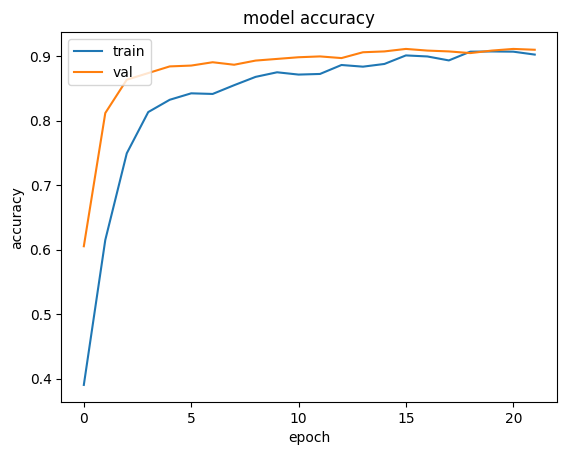

In [344]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

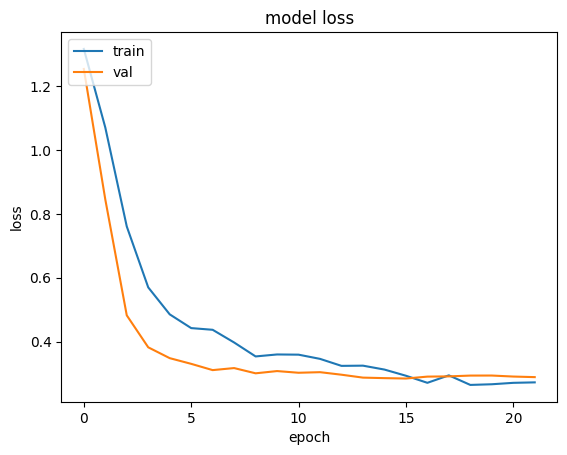

In [345]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

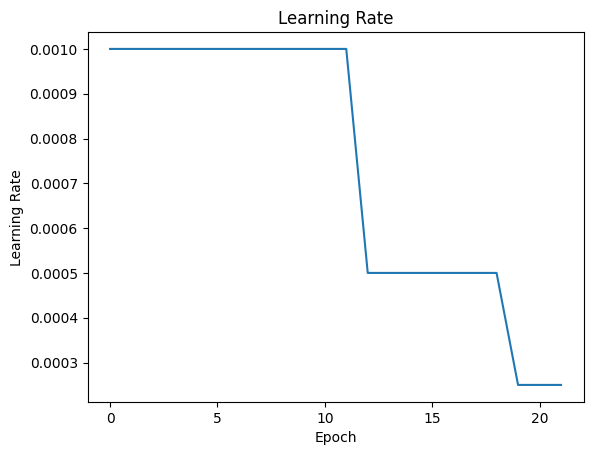

In [346]:
# plot learning rate
plt.plot(history.history['learning_rate'])
plt.title('Learning Rate')
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


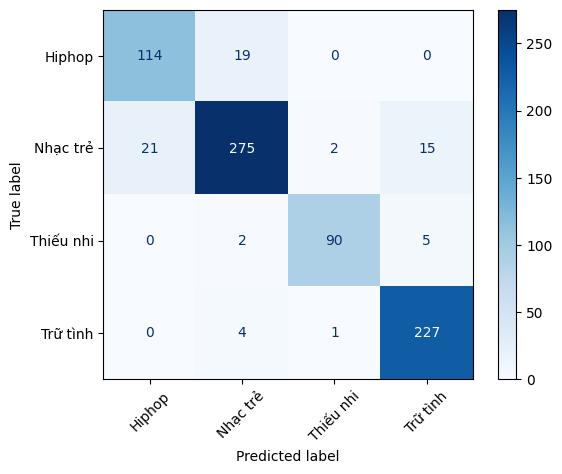

In [347]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

labels_text = pd.get_dummies(df["label"]).columns.tolist()

cm = confusion_matrix(y_true, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_text)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()

In [348]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       133
           1       0.92      0.88      0.90       313
           2       0.97      0.93      0.95        97
           3       0.92      0.98      0.95       232

    accuracy                           0.91       775
   macro avg       0.91      0.91      0.91       775
weighted avg       0.91      0.91      0.91       775



In [349]:
import pickle
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

labels_text = ['Hiphop', 'Nhạc trẻ', 'Thiếu nhi', 'Trữ tình']

cm = confusion_matrix(y_true, y_pred_classes)
report = classification_report(y_true, y_pred_classes, target_names=labels_text, output_dict=True)

history = {
    'loss': history.history['loss'],
    'val_loss': history.history.get('val_loss'),
    'accuracy': history.history.get('accuracy'),
    'val_accuracy': history.history.get('val_accuracy'),
    'learning_rate': history.history.get('learning_rate'),
    'confusion_matrix': cm,
    'classification_report': report,
    'labels_text': labels_text,
}

with open('history.pkl', 'wb') as f:
    pickle.dump(history, f)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [350]:
from google.colab import files
files.download("best_model.h5")
files.download('history.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>